# PCA
主成分分析（Principal components analysis，PCA）是一种减少数据集维数的方法，同时保持数据集中的对方差贡献最大的特征，使得经过转化过的特征之间不相关，减少冗余信息

## 理论
$\def\bm{\boldsymbol}$
对于数据 
$$
\bm X_{m\times n} = 
\begin{pmatrix}
x_{11} & \dots & x_{1n} \\
\vdots & \ddots& \vdots \\
x_{m1} & \dots & x_{mn}
\end{pmatrix}
$$

其中 $n$ 为特征维数，$m$ 为样本数量 

首先特征零均值化 

$$
\bm X' = \bm X - (\bm\mu_1,...,\bm\mu_n)
$$

协方差矩阵为

$$
\begin{align}
cov(\bm X,\bm X) &= E[(\bm x-\mu)(\bm x-\mu)^T] \\ \\
&=
\begin{pmatrix}
\frac{1}{m}\sum_{i}^{m}{x'_{i1}}^2 & \dots & 
\frac{1}{m}\sum_{i}^{m}x'_{i1}x'_{in} \\
\vdots & \ddots & \vdots \\
\frac{1}{m}\sum_{i}^{m}x'_{in}x'_{i1} & \dots & 
\frac{1}{m}\sum_{i}^{m}{x'_{in}}^2
\end{pmatrix} \\ \\
&= \frac{1}{m} {\bm X'}^T\bm X' = C
\end{align}
$$

为使经过变换的特征方差最大，即协方差矩阵对角线最大；为使经过变换的特征之间协方差为 0，即协方差矩阵除对角线外为 0。又由于协方差矩阵为实对称阵，可以容易联想到对角化

$$
\begin{align}
\bm \Lambda &= \bm P^T C \bm P\\ \\
&= \frac{1}{m} \bm P^T {\bm X'}^T\bm X' \bm P\\ \\
&= \frac{1}{m} \bm (\bm X' \bm P)^T \bm X' \bm P\\ \\
\Rightarrow &\bm Y = \bm X \bm P
\end{align}
$$

这其中的具体证明不再复述

## 方法
1. 特征零均值化，计算 $\bm X'$

2. 计算 $\frac{1}{m} {\bm X'}^T\bm X'$

3. 计算协方差矩阵特征值

4. 特征值排序，并选择对应特征向量，作为 $P$

5. $\bm Y = \bm X \bm P$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# %matplotlib widget

In [2]:
def PCA(X, k=None):
    # X：数据
    # k：保留的维数
    
    # 特征零均值化
    Xc = X - X.sum(axis=0)
    
    # 计算协方差矩阵
    C = 1/len(Xc)*Xc.T@Xc
    
    # 计算协方差矩阵特征值
    ev, fv = np.linalg.eig(C)
    
    # 特征值排序，并选择对应特征向量，作为 P
    index = np.argsort(ev)[::-1]
    if k is not None:
        P = fv[:, index[:k]]
    else:
        P = fv[:, index]
    
    # 计算 Y = XP
    Y = X@P
    
    return Y

In [3]:
from sklearn import datasets
iris = datasets.load_iris().data

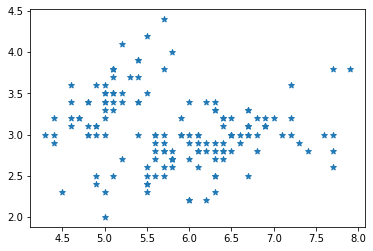

In [4]:
# 原数据分布
plt.close('all')
fig = plt.figure()
plt.scatter(iris[:,0], iris[:,1], marker='*');

In [5]:
iris_PCA = PCA(iris, 2)

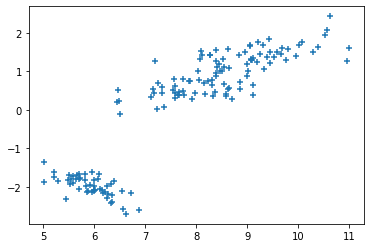

In [6]:
# PCA后数据分布
fig = plt.figure()
plt.scatter(iris_PCA[:,0], iris_PCA[:,1], marker='+');

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_PCA = pca.fit_transform(iris)

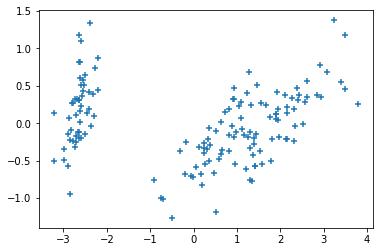

In [8]:
# 和 sklearn 库比照，不同是因为 特征向量的正负
fig = plt.figure()
plt.scatter(iris_PCA[:,0], iris_PCA[:,1], marker='+');

# Kenerl Trick

核技巧：通过替换内积公式间接实现空间变换

存在某种非线性空间变换 $\phi(\bm x)$ ,可以使得数据线性可分

但找到这种映射是很困难的，而很多算法都要使用内积,因此我们可以通过假定，非线性变换后的内积，来实现非线性空间变换

$$
k(\bm x_1,\bm x_2) = \phi(\bm x_1)^T\phi(\bm x_2)
$$

著名的高斯核函数：
$$
k(\bm x_1,\bm x_2) = exp(-\frac{||\bm x_1 - \bm x_2||^2}{2\delta^2})
$$

## 寻找（构造） PCA 算法中的内积运算

$$
\def\bm{\boldsymbol}
\phi(X) = [\phi(\bm x_1),\dots,\phi(\bm x_)]^T \\ \\
$$


$$
\begin{align}
\overline C & = \frac{1}{m}\phi(X)^T\phi(X) \\ \\
& = \frac{1}{m}\sum_{i=1}^m \phi(\bm x_i)\phi(\bm x_i)^T \\ \\
\end{align}
$$

我们的目的是求解一下特征值问题
$$
\overline C\bm p=\lambda \bm p
$$


将上式代入其中，得到

$$
\frac{1}{m}\sum_{i=1}^m \phi(\bm x_i)\phi(\bm x_i)^T \bm p = \lambda \bm p
$$


两边同时除以 $\lambda$


$$
\bm p = \frac{1}{\lambda m} \sum_{i=1}^m \phi(\bm x_i)[\phi(\bm x_i)^T \bm p]
$$


观察到 $\phi(\bm x_i)^T \bm p$ 是一个标量，所以


$$
\bm p = \sum_{i=1}^m \alpha_i \phi(\bm x_i) = \phi(X)^T\bm \alpha
$$


代回 $\phi(X)^T\phi(X)\bm p = \lambda \bm p$ ，得


$$
\begin{align}
\frac{1}{m}\phi(X)^T\phi(X)\phi(X)^T\bm \alpha &= \lambda \phi(X)^T\bm \alpha \\ \\
\frac{1}{m}\phi(X)\phi(X)^T\phi(X)\phi(X)^T\bm \alpha &= \lambda \phi(X)\phi(X)^T\bm \alpha
\end{align}
$$


定义矩阵 $K = \phi(X)\phi(X)^T$ ，根据核函数要求其为对称半正定矩阵，


$$
K_{ij}=\phi(\bm x_i)^T\phi(\bm x_j)=k(\bm x1,\bm x2)
$$


至此便找到了PCA中的内积，问题变为求解一下特征值问题


$$
\begin{align}
\frac{1}{m}K\cdot K\bm \alpha &= \lambda K \bm \alpha \\ \\
\frac{1}{m}K\bm \alpha &= \lambda \bm \alpha
\end{align}
$$

变化后的空间如下，
$$
Y = \phi(X)\bm p = K\bm \alpha
$$
注意本证明为和 Numpy 中的习惯配合，$X$ 是其它常见证明中的转置

In [9]:
# 高斯核
def GaussKernel(delta=1):
    def GaussKernelF(x, y):
        return np.exp(-((x-y)**2).sum()/(2*delta**2))
    return GaussKernelF

In [10]:
# 线性核
def linearKernel():
    def linearKernelF(x, y):
        return x@y
    return linearKernelF

In [11]:
def KPCA(X, k=None, kernel=linearKernel()):
    # X：数据
    # k：保留的维数
    # kernel：核函数

    # 特征零均值化
    X = X - X.sum(axis=0)
    
    # 计算 1/m*K
    K = np.ndarray((len(X), len(X)))
    
    # 没有查询到如何写成向量形式，暂且只能这样
    for i in range(len(X)):
        for j in range(len(X)):
            K[i,j] = kernel(X[i],X[j])
    
    # 计算 K 特征值与特征向量
    ev, fv = np.linalg.eig(K)
    
    # 特征值排序，并选择对应特征向量，作为 a
    index = np.argsort(ev)[::-1]
    if k is not None:
        a = fv[:, index[:k]]
    else:
        a = fv[:, index]
    
    # 计算 Y = XP
    Y = K@a
    
    return Y

In [21]:
iris_KPCA = KPCA(iris, k=2, kernel=linearKernel())

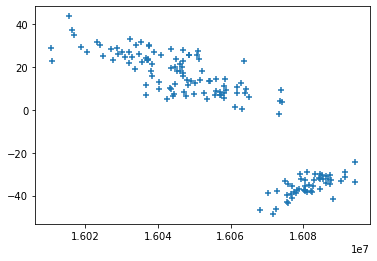

In [22]:
fig = plt.figure()
plt.scatter(iris_KPCA[:,0], iris_KPCA[:,1], marker='+');

In [28]:
iris_KPCA = KPCA(iris, k=2, kernel=GaussKernel(2))

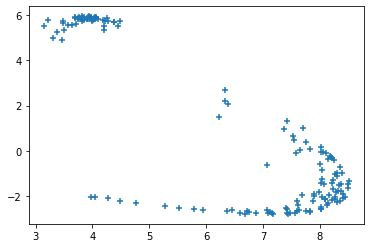

In [29]:
fig = plt.figure()
plt.scatter(iris_KPCA[:,0], iris_KPCA[:,1], marker='+');

In [16]:
# 在线性不可分数据集上的效果
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

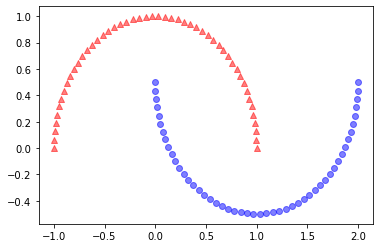

In [17]:
fig = plt.figure()
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5);
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5);

In [18]:
X_KPCA = KPCA(X, kernel=GaussKernel(0.1))

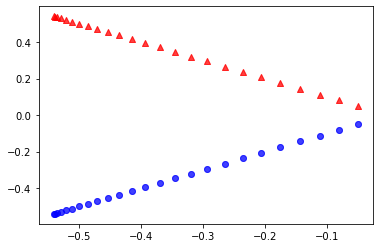

In [19]:
fig = plt.figure()
plt.scatter(X_KPCA[y==0, 0], X_KPCA[y==0, 1], color='red', marker='^', alpha=0.5);
plt.scatter(X_KPCA[y==1, 0], X_KPCA[y==1, 1], color='blue', marker='o', alpha=0.5);

# 今后的学习
1. 如何对 KPCA 进行重构
2. 解决目前 KPCA 尺度上的一点小问题